In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [122]:
from sklearn.datasets import load_iris
data = load_iris()
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [123]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df = df.drop(columns=['sepal length (cm)', 'sepal width (cm)'])
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


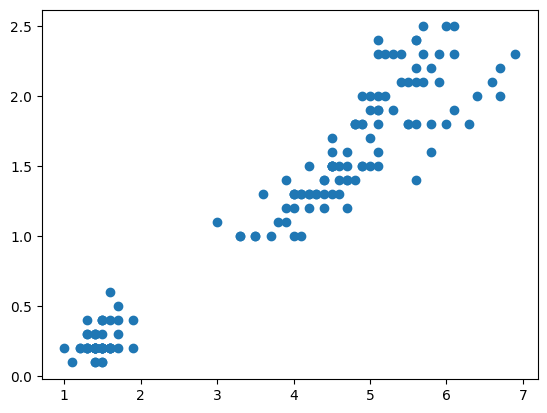

In [124]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(np.array(df['petal length (cm)']).reshape(-1,1))
df['petal length (cm)'] = scaler.transform(np.array(df['petal length (cm)']).reshape(-1,1))

scaler.fit(np.array(df['petal width (cm)']).reshape(-1,1))
df['petal width (cm)'] = scaler.transform(np.array(df['petal width (cm)']).reshape(-1,1))
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [126]:
from sklearn.cluster import KMeans

In [127]:
km = KMeans(n_clusters=3)
predictions = km.fit_predict(df)
predictions

f:\Anaconda\envs\AI\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\Anaconda\envs\AI\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [128]:
df['cluster'] = predictions
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


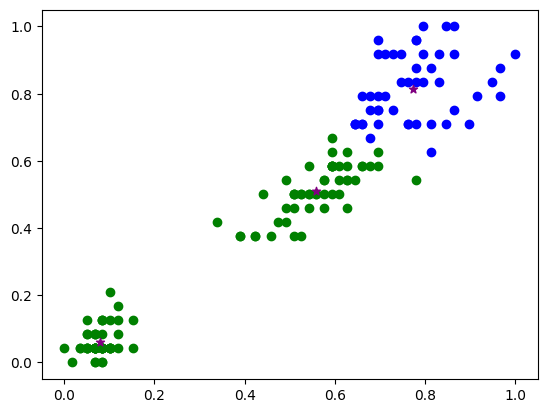

In [129]:
cl1 = df[df.cluster == 0]
cl2 = df[df.cluster == 1]
cl3 = df[df.cluster == 2]

plt.scatter(cl1['petal length (cm)'], cl1['petal width (cm)'], color='red')
plt.scatter(cl2['petal length (cm)'], cl2['petal width (cm)'], color='orange')
plt.scatter(cl3['petal length (cm)'], cl3['petal width (cm)'], color='green')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

In [130]:
sse = []
for k in range(1, 10):
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_) #SSE
sse

f:\Anaconda\envs\AI\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\Anaconda\envs\AI\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
f:\Anaconda\envs\AI\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
f:\Anaconda\envs\AI\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_

[128.2616865530605,
 38.22615884825026,
 1.7018746881920963,
 1.2555382834168465,
 0.8535683225340072,
 0.6801035704886195,
 0.5651273455703979,
 0.48699860502649284,
 0.43742271620676254]

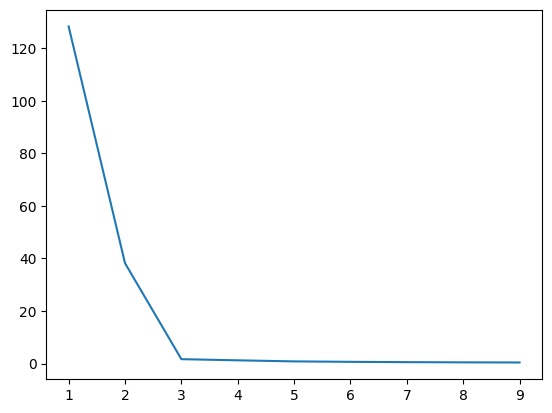

In [131]:
plt.plot(range(1,10), sse)